In [62]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Load iris data
iris = load_iris()
X = iris.data
y = iris.target
features = iris.feature_names
target_names = iris.target_names

In [41]:
df = pd.DataFrame(X, columns=features)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


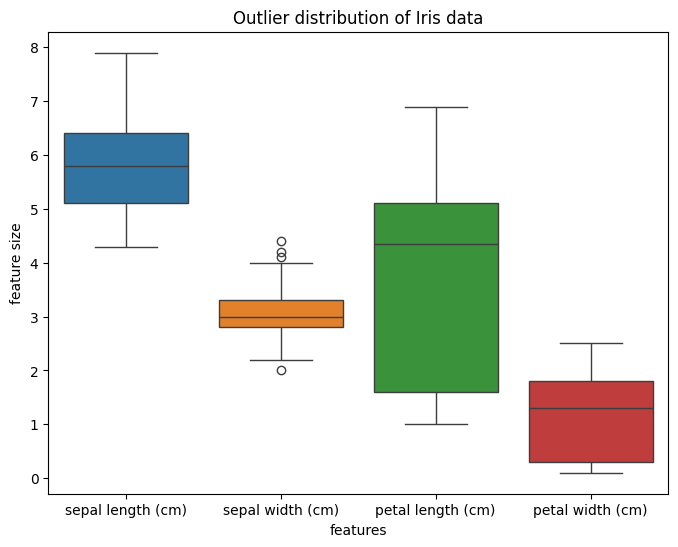

In [35]:
# check outliers
fig, ax = plt.subplots(figsize = (8, 6))
sns.boxplot(data=X, orient="v")
ax.set_xticks([0, 1, 2, 3], ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
ax.set_title("Outlier distribution of Iris data")
ax.set_xlabel("features")
ax.set_ylabel("feature size")
plt.show()

In [47]:
# Remove outliers
def remove_outliers(df: pd.DataFrame, features: list) -> pd.DataFrame:
    df = df.copy()

    for col in features:
        Q1 = df[col].quantile(0.05)
        Q3 = df[col].quantile(0.95)

        IQR = Q3-Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

df_without_outliers = remove_outliers(df=df, features=features)
df_without_outliers

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [49]:
# Rescale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_without_outliers)
df_scaled.shape

(150, 4)

有兩種方法可以執行Hierarchical analysis:

1. sklearn 的  AgglomerativeClustering

2. scipy 的 linkage, dendrogram

In [55]:
### sklearn AgglomerativeClustering()
# distance_threshold=0 to ensure we compute the full tree.
# n_cluster決定節點數量
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="ward")
model = model.fit(X=X)

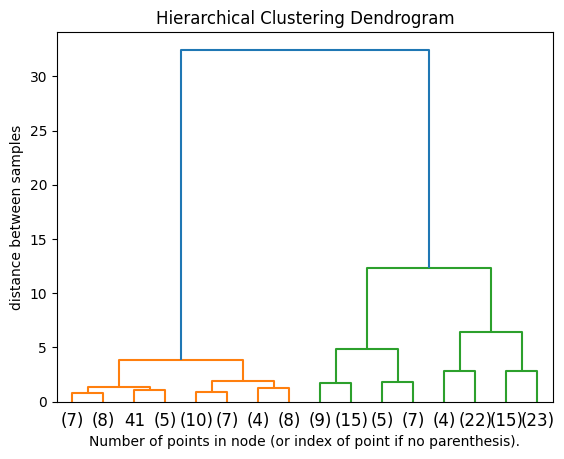

In [57]:
# sklearn demo
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0]) # 149個0
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("distance between samples")
plt.show()

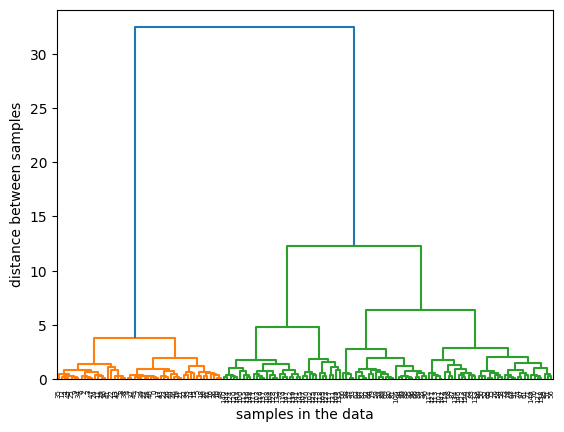

In [61]:
### scipy linkage + dendrogram
# metric 計算單點之間的距離，形成一個cluster
# method 計算clusters之間的距離，形成更大的cluster
clustering = linkage(X, method="ward", metric="euclidean")
dendrogram(clustering)
plt.xlabel("samples in the data")
plt.ylabel("distance between samples")
plt.show()

In [67]:
# cut tree labels to 3
cluster_labels = cut_tree(clustering, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

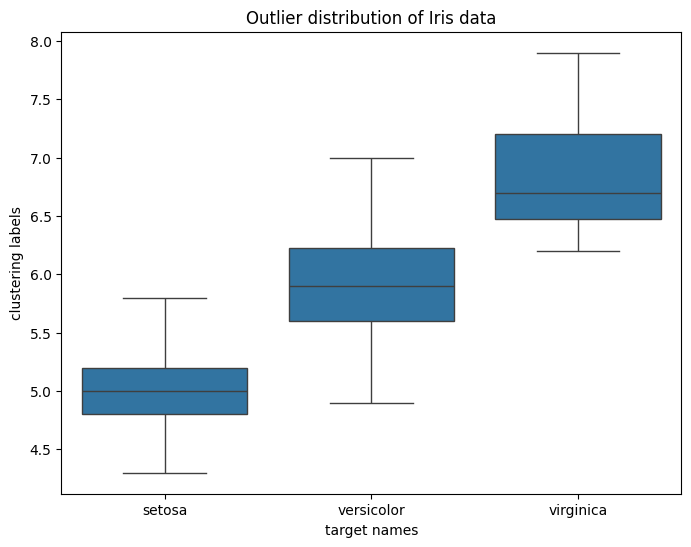

In [77]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.boxplot(x="cluster_labels", y='sepal length (cm)', data=df_without_outliers, orient="v")
ax.set_xticks([0, 1, 2], target_names)
ax.set_title("Outlier distribution of Iris data")
ax.set_xlabel("target names")
ax.set_ylabel("clustering labels")
plt.show()